In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline 

In [4]:
dataset = pd.read_csv('cars.csv')

In [5]:
dataset

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


To train the ML model, data such as the car company name and model are unnecessary and should be removed.

In [6]:
dataset.drop(['Car', 'Model'], axis = 1, inplace = True)

In [7]:
dataset

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105
5,1000,929,105
6,1400,1109,90
7,1500,1365,92
8,1500,1112,98
9,1600,1150,99


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  36 non-null     int64
 1   Weight  36 non-null     int64
 2   CO2     36 non-null     int64
dtypes: int64(3)
memory usage: 992.0 bytes


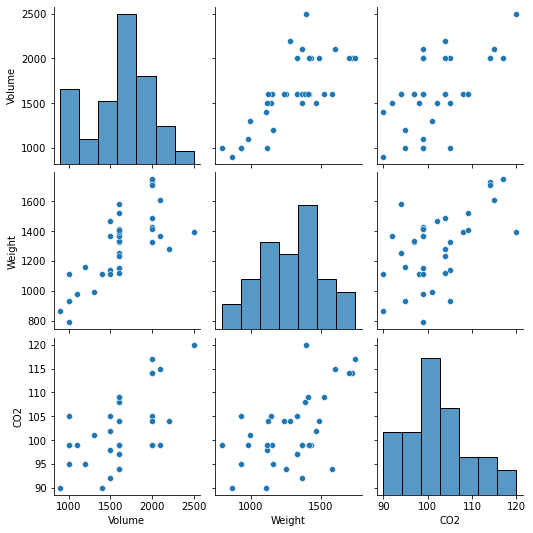

In [9]:
sns.pairplot(dataset)

The distribution of values depicted in the charts suggests that the Decision Tree Regressor may be the best predictive model. However, it is important to investigate other models to confirm this hypothesis. By exploring alternative models, we can validate the claim and ensure the selection of the most suitable predictive algorithm.

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
X

array([[1000,  790],
       [1200, 1160],
       [1000,  929],
       [ 900,  865],
       [1500, 1140],
       [1000,  929],
       [1400, 1109],
       [1500, 1365],
       [1500, 1112],
       [1600, 1150],
       [1100,  980],
       [1300,  990],
       [1000, 1112],
       [1600, 1252],
       [1600, 1326],
       [1600, 1330],
       [1600, 1365],
       [2200, 1280],
       [1600, 1119],
       [2000, 1328],
       [1600, 1584],
       [2000, 1428],
       [2100, 1365],
       [1600, 1415],
       [2000, 1415],
       [1500, 1465],
       [2000, 1490],
       [2000, 1725],
       [1600, 1523],
       [2000, 1705],
       [2100, 1605],
       [2000, 1746],
       [1600, 1235],
       [1600, 1390],
       [1600, 1405],
       [2500, 1395]], dtype=int64)

In [12]:
y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120], dtype=int64)

Linear Regression model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Real": y_test})
results["Difference"] = results["Prediction"] - results["Real"]
print(results)

   Prediction  Real  Difference
0  108.549002   117   -8.450998
1  104.318040    94   10.318040
2  102.721611    99    3.721611
3  108.283675   115   -6.716325
4  106.534163    99    7.534163
5  102.466474    97    5.466474
6   96.102551    99   -2.897449
7   94.968269    95   -0.031731


Decision Tree Regressor model

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [17]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Real": y_test})
results["Difference"] = results["Prediction"] - results["Real"]
print(results)

   Prediction  Real  Difference
0       117.0   117         0.0
1        94.0    94         0.0
2        99.0    99         0.0
3       115.0   115         0.0
4        99.0    99         0.0
5        97.0    97         0.0
6        99.0    99         0.0
7       100.0    95         5.0


Random Forest Regressor model

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Real": y_test})
results["Difference"] = results["Prediction"] - results["Real"]
print(results)

   Prediction  Real  Difference
0      116.40   117       -0.60
1       98.00    94        4.00
2       98.30    99       -0.70
3      109.70   115       -5.30
4      100.80    99        1.80
5       99.50    97        2.50
6       99.40    99        0.40
7       99.25    95        4.25


SVR Model

In [20]:
y = y.reshape(len(y),1)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [23]:
X_test_scaled = sc_X.transform(X_test)
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
results = pd.DataFrame({"Prediction": y_pred.flatten(), "Real": y_test})
results["Difference"] = results["Prediction"] - results["Real"]
print(results)

   Prediction  Real  Difference
0  113.928521   117   -3.071479
1  105.856282    94   11.856282
2   98.399443    99   -0.600557
3  110.746289   115   -4.253711
4  102.177709    99    3.177709
5   97.784093    97    0.784093
6   98.878113    99   -0.121887
7   98.785761    95    3.785761
